In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.special import wofz

In [2]:
data_file = 'wed10h25.txt'

xdata, raw_ydata = np.loadtxt(
    data_file,
    delimiter=',',
    skiprows=1,
    usecols=(0, 1),
    unpack=True
)

raw_err = []
for i in raw_ydata:
    raw_err.append(np.sqrt(i))

plt.scatter(xdata, ydata_raw, color='red', marker='o', alpha=1)
plt.errorbar(xdata, ydata_raw, ydata_raw_err, color='red')

plt.xlabel('$t$ [microseconds]')
plt.ylabel(r'$N$')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.savefig('raw_data.pdf', dpi=100, bbox_inches='tight')
plt.show()

[14.933184523068078, 12.24744871391589, 10.44030650891055, 7.211102550927978, 5.5677643628300215, 4.358898943540674, 4.123105625617661, 3.7416573867739413, 2.23606797749979, 2.0, 1.7320508075688772, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.0, 1.4142135623730951, 1.7320508075688772, 1.0]


NameError: name 'ydata_raw' is not defined

slope: -0.3953841268243646 +- 0.024019563820624177
intercept: 5.917100569844945 +- 0.10256671172148112
Lifetime is 2.5291860045869132 +- 0.15364790979176268


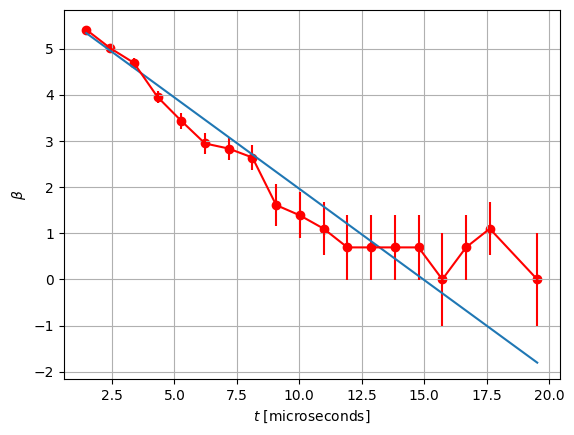

In [30]:
ydata = [math.log(y) for y in ydata_raw]
yerr = [err / y for y, err in zip(ydata_raw, raw_err)]

ydata, yerr = np.array(ydata), np.array(yerr)

def func(x, m, b):
    return m * x + b

initialguess = [1, 1]  # lam

fit, covariance = optimize.curve_fit(
    func,
    xdata,
    ydata,
    sigma=yerr,  # Provide sigma as a 1-D array of uncertainties
    p0=initialguess  # Use 'p0' instead of 'initialguess'
)

print("slope:", fit[0], "+-", np.sqrt(covariance[0][0]))
print("intercept:", fit[1], "+-", np.sqrt(covariance[1][1]))

print('Lifetime is', -1/fit[0], '+-', np.sqrt(covariance[0][0])/fit[0]**2)

plt.scatter(xdata, ydata, color='red', marker='o', alpha=1)
plt.errorbar(xdata, ydata, yerr, color='red')
xdatafit = np.linspace(min(xdata), max(xdata), 100)
func_plot = func(xdatafit, *fit)

plt.plot(xdatafit, func_plot)

plt.xlabel('$t$ [microseconds]')
plt.ylabel(r'$\beta$')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.savefig('fig_fitted.pdf', dpi=100, bbox_inches='tight')
plt.show()

In [24]:
import numpy as np
from scipy import optimize
import math

ydata = [math.log(y) for y in ydata_raw]
yerr = [err / y for y, err in zip(ydata_raw, raw_err)]

ydata, yerr = np.array(ydata), np.array(yerr)

def func(x, m, b):
    return m * x + b

initialguess = [1, 1]  # lam

fit, covariance = optimize.curve_fit(
    func,
    xdata,
    ydata,
    sigma=yerr,  # Provide sigma as a 1-D array of uncertainties
    p0=initialguess  # Use 'p0' instead of 'initialguess'
)

print("Fit parameters:", fit)
print("Covariance matrix:", covariance)

Fit parameters: [-0.39538413  5.91710057]
Covariance matrix: [[ 0.00057694 -0.0019318 ]
 [-0.0019318   0.01051993]]


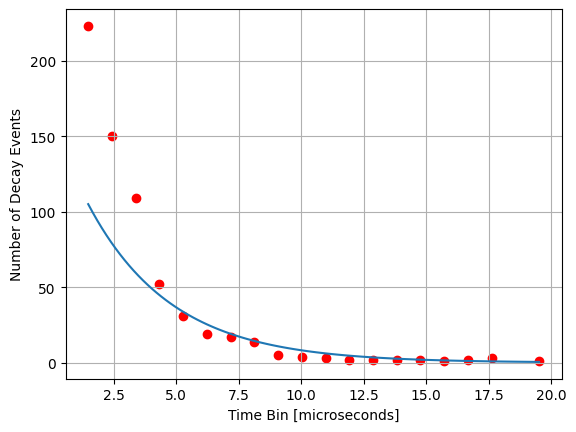

In [94]:
# Recast as exponential

for i in range(len(func_plot)):
    func_plot[i] = math.exp(func_plot[i])

for i in range(len(ydata)):
    ydata[i] = math.exp(ydata[i])

plt.scatter(xdata, ydata, color='red', marker='o', alpha=1)
plt.plot(xdatafit, func_plot)

plt.xlabel('Time Bin [microseconds]')
plt.ylabel('Number of Decay Events')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

#plt.savefig('fit_diode.pdf', dpi=100, bbox_inches='tight')
plt.show()

100
100
slope: 0.29896412696417274 +- 1.8011142607254283e-17
slope: 163.15228190677988 +- 1.0237444661295128e-14


C:\Users\kylem\AppData\Local\Temp\ipykernel_4064\2662947198.py:8: RuntimeWarning: overflow encountered in exp
  return D0 * np.exp(-x * lam)
C:\Users\kylem\AppData\Local\Temp\ipykernel_4064\2662947198.py:8: RuntimeWarning: overflow encountered in multiply
  return D0 * np.exp(-x * lam)


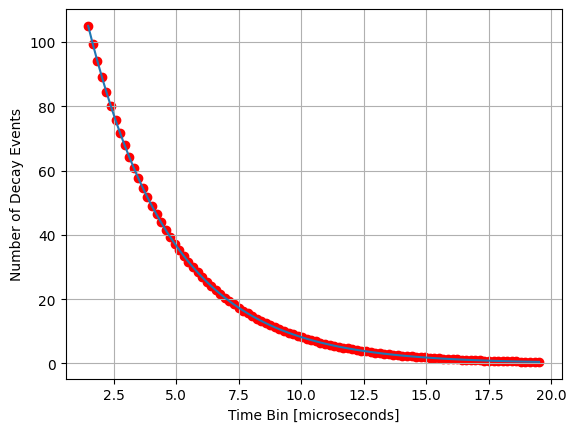

In [95]:
print(len(xdatafit))
print(len(func_plot))

xdata = xdatafit
ydata = func_plot

def func(x,lam,D0):
    return D0 * np.exp(-x * lam)

initialguess = [10,10]

fit, covariance = optimize.curve_fit(
    func,
    xdata,
    ydata,
    initialguess
)

print("lambda:", fit[0], "+-", np.sqrt(covariance[0][0]))
print("D0:", fit[1], "+-", np.sqrt(covariance[1][1]))

plt.scatter(xdata, ydata, color='red', marker='o', alpha=1)
xdatafit = np.linspace(min(xdata), max(xdata), 100)
func_plot = func(xdatafit, *fit)

plt.plot(xdatafit, func_plot)

plt.xlabel('Time Bin [microseconds]')
plt.ylabel('Number of Decay Events')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

#plt.savefig('fig.pdf', dpi=100, bbox_inches='tight')
plt.show()